<a href="https://colab.research.google.com/github/lucaspinheiro27/Python_statistics/blob/main/Saude_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy import stats
%matplotlib inline
from scipy.stats import norm

In [2]:
df = pd.read_excel('/content/Saude_Mental.xlsx')
df.sample(21)

,Data,Humor Geral,Qualidade de sono,Atividade Física,Interação Social,Sentimento predominanete,Quantidade de horas de sono,Alimentação,Relexões e comentários,Cansaço
15,2024-10-18,6,6,Sim,Moderada,Depressão,7,Ruim,Estou sem esperança,Sim
14,2024-10-17,5,6,Sim,Moderada,Depressão,8,Ruim,Não estou bem,Sim
8,2024-10-11,8,7,Sim,Moderada,Alegria,6,Boa,Estou confiante,Sim
19,2024-10-22,7,8,Sim,Moderada,Alegria,7,Moderada,Estou bem,Não
18,2024-10-21,8,7,Não,Baixa,Alegria,6,Moderada,Estou alegre,Não
11,2024-10-14,7,6,Sim,Moderada,Ansiedade,6,Moderada,Estou me sentindo para baixo,Sim
9,2024-10-12,8,8,Sim,Muita,Alegria,7,Moderada,Estou me sentindo bem,Sim
10,2024-10-13,8,8,Não,Baixa,Alegria,9,Boa,Estou me sentindo feliz,Não
2,2024-10-05,7,6,Não,Muita,Depressão,5,Moderada,Me sentindo solitário,Sim
17,2024-10-20,6,6,Não,Baixa,Depressão,7,Moderada,Estou me sentindo triste,Não


In [3]:
df.rename(columns = {'Atividade Física ':'Atividade Fisica'}, inplace = True)
print(df.columns)

Index(['Data', 'Humor Geral', 'Qualidade de sono', 'Atividade Fisica',
       'Interação Social', 'Sentimento predominanete',
       'Quantidade de horas de sono', 'Alimentação', 'Relexões e comentários',
       'Cansaço'],
      dtype='object')


$$
\text{Relative Frequency} = \frac{f}{n}
$$

In [4]:
frequency_table = df['Atividade Fisica'].value_counts()
frequency_table['Total'] = frequency_table.sum()
frequency_table

,count
Atividade Fisica,
Sim,15
Não,6
Total,21


In [5]:
percentage = (frequency_table / frequency_table['Total']) * 100
percentage

,count
Atividade Fisica,
Sim,71.428571
Não,28.571429
Total,100.000000


In [6]:
difference = frequency_table['Sim'] - frequency_table['Não']
proportion = difference / frequency_table['Total']
print(f"A diferença do número de dias que houve atividade fisica é {difference} dias e a proporção do que isso representa é de {proportion:.2f}")

A diferença do número de dias que houve atividade fisica é 9 dias e a proporção do que isso representa é de 0.43


In [7]:
frequency_sentimento = df['Sentimento predominanete'].value_counts()
freq_total = frequency_sentimento.sum()
print(f"Frequência total de dias:{freq_total}")

Frequência total de dias:21


In [8]:
percentage_sentimento = pd.DataFrame(index=frequency_sentimento.index)
percentage_sentimento['Porcentagem'] = (frequency_sentimento / freq_total) * 100
frequency_sentimento = pd.concat([frequency_sentimento, percentage_sentimento], axis=1)

frequency_sentimento['Diferença da Porcentagem Total'] = frequency_sentimento['Porcentagem'] - percentage_sentimento['Porcentagem'].sum()

frequency_sentimento

,count,Porcentagem,Diferença da Porcentagem Total
Sentimento predominanete,,,
Alegria,9,42.857143,-57.142857
Depressão,7,33.333333,-66.666667
Ansiedade,5,23.809524,-76.190476


# The sample mean formula
$$
\bar{X} = \frac{\sum X}{N}
$$

In [9]:
moodmean = np.mean(df['Humor Geral'])
print('mean of mood:', moodmean)

sqmean = np.mean(df['Qualidade de sono'])
print('mean of sleep quality: ', sqmean)

squantitymean = np.mean(df['Quantidade de horas de sono'])
print('mean of sleep hours:', squantitymean)

mean of mood: 6.809523809523809
mean of sleep quality:  7.0
mean of sleep hours: 6.9523809523809526


# The median formula
$$
\text{Median} = \frac{n + 1}{2}
$$

In [10]:
moodmedian = np.median(df['Humor Geral'])
print('median of mood:', moodmean)

sqmedian = np.median(df['Qualidade de sono'])
print('median of sleep quality: ', sqmean)

squantitymedian = np.median(df['Quantidade de horas de sono'])
print('median of sleep hours:', squantitymean)

median of mood: 6.809523809523809
median of sleep quality:  7.0
median of sleep hours: 6.9523809523809526


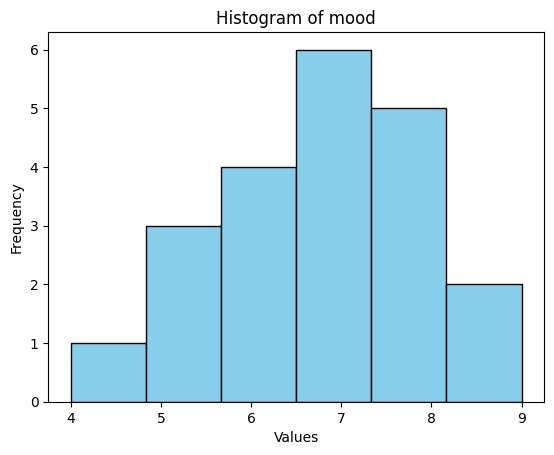

In [11]:
plt.hist(df['Humor Geral'], bins=6, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of mood')
plt.show()

* As we can see the data are skewed to left side, which the mean is smaller compared to the median

# Standard deviation formula
$$
s = \sqrt{\frac{\sum (x - \bar{x})^2}{n - 1}}
$$

* Using numpy

In [12]:
sample_std = np.std(df['Humor Geral'], ddof=1)
print('Standard deviation of mood: ', sample_std)

Standard deviation of mood:  1.3645163106041502


* Function

In [13]:
# Put the data into a variable
data = df['Humor Geral']

def standard_deviation(data, ddof=0):
  # Calculate th mean of the data
  mean_data = sum(data) / len(data)
  # Calculate the squared differences for each data and mean
  squared_diffs = [(x - mean_data) ** 2 for x in data]
  # Calculate the average of the squared differences
  variance= sum(squared_diffs) / (len(squared_diffs) - ddof)
  # Calculate the square root of the variance
  stddev = variance ** 0.5
  return stddev

In [14]:
sample_std_func = standard_deviation(data, ddof=1)
std_sleep_quality = standard_deviation(df['Qualidade de sono'], ddof=1)
print('Standard deviation of mood: ', sample_std_func)
print('Standard deviation of Sleep quality: ', std_sleep_quality)

Standard deviation of mood:  1.3645163106041502
Standard deviation of Sleep quality:  1.3416407864998738


* basically this means a small standard deviation that the values in data set are close to the mean of the data set, on average

# Properties of standard deviation

- Can never be a negative number due to calculating the distances

- It is affected by outliers, it based on the distance from the mean

- Has the same units as the original data

# Normal distribution

In [15]:
print(f"Standard deviation of mood: ", sample_std)
print(f"Mood mean: ", moodmean)

Standard deviation of mood:  1.3645163106041502
Mood mean:  6.809523809523809


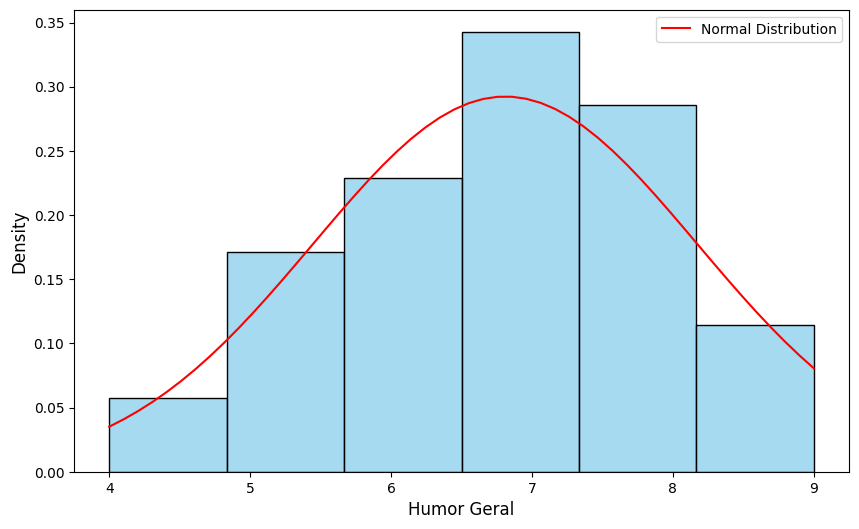

In [16]:
plt.figure(figsize=(10, 6))
mood_hist = sns.histplot(df['Humor Geral'], kde=False, color='skyblue', bins=6, stat='density')

x = np.linspace(df['Humor Geral'].min(), df['Humor Geral'].max())
y = norm.pdf(x, loc=moodmean, scale=sample_std)

mood_hist.plot(x, y, color='red', label='Normal Distribution')

plt.xlabel('Humor Geral', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

* the median describes center more fairly than
the mean when the data is skewed

# Evaluating the normal distribution through probability plot

* One way to analyze how close the histogram is to the curve involves constructing a normal probability plot(Q-Q plot - quantile-quantile)

* Any deviation from normality leads to deviations of these points from the line. the points general mood tend to follow the line but with some errant points toward the tails. To simulate the dat that came from a normal a normal distribution

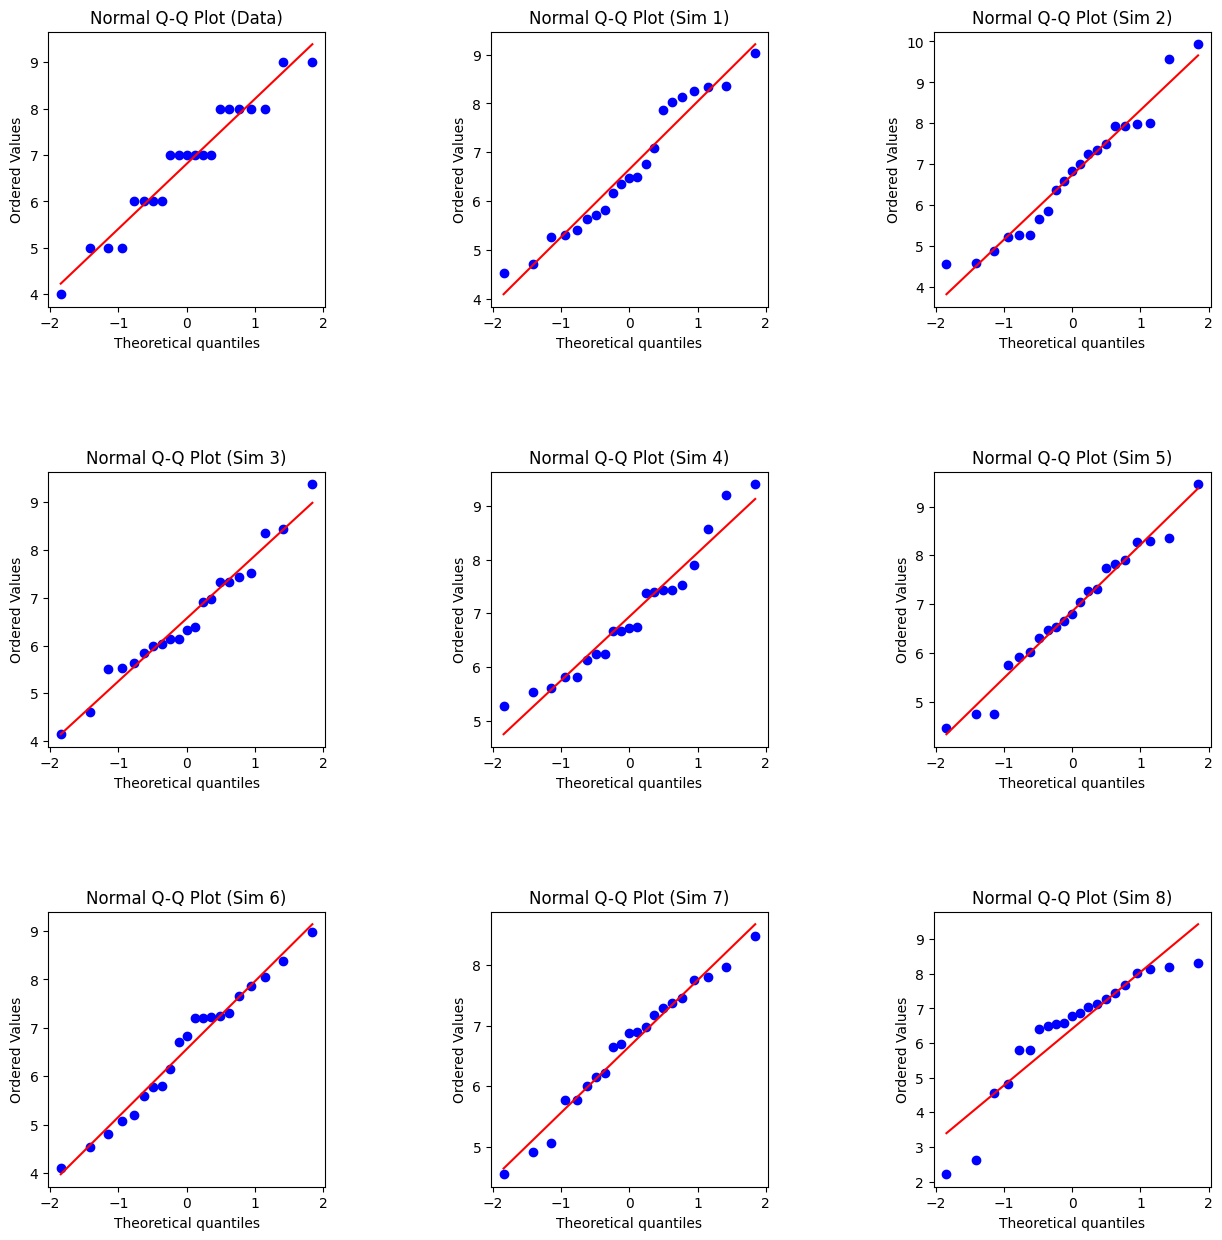

In [17]:
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(df['Humor Geral']), loc=moodmean, scale=sample_std))

plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout(pad = 1)
plt.subplots_adjust(hspace = 0.6, wspace = 0.6)

plt.subplot(3, 3, 1)
probplot(df['Humor Geral'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Sim 1)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Sim 2)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Sim 3)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Sim 4)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Sim 5)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Sim 6)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Sim 7)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Sim 8)')

plt.show();

* Even better than comparing the original plot to a single plot generated from a normal distribution is to compare it to many more plots. In this case, we draw random samples from a normal distribution eight times, so we can construct eight different normal probability plots.

# Calculating percentiles

$$
P = \frac{X_n - 0.5}{N} \times 100
$$

In [18]:
percentile_25 = np.percentile(df['Quantidade de horas de sono'], 25)
print("25th percentile:", percentile_25)

percentile_50 = np.percentile(df['Quantidade de horas de sono'], 50)
print("50th percentile (median):", percentile_50)

percentile_75 = np.percentile(df['Quantidade de horas de sono'], 75)
print("75th percentile:", percentile_75)

25th percentile: 6.0
50th percentile (median): 7.0
75th percentile: 8.0


* Manual sorting

In [19]:
data_sorted = np.sort(df['Quantidade de horas de sono'])
index = int(len(df['Quantidade de horas de sono']) * 0.25)
percentile_25_manual = data_sorted[index]
print("25th percentile (manual):", percentile_25_manual)

25th percentile (manual): 6


* The five number summary is used when the data is not bell shaped, then we use a different set of statistics to describe the bigger picture

In [20]:
data = df['Qualidade de sono']

quartiles = percentile(data, [25, 50, 75])
data_min, data_max = data.min(), data.max()

print("Five number summary")
print('Min: %.2f' % data_min)
print('Q1: %.2f' % quartiles[0])
print('Median: %.2f' % quartiles[1])
print('Q3: %.2f' % quartiles[2])
print('Max: %.2f' % data_max)

Five number summary
Min: 3.00
Q1: 6.00
Median: 7.00
Q3: 8.00
Max: 9.00


* To interpret the five number summary we can use boxplot.

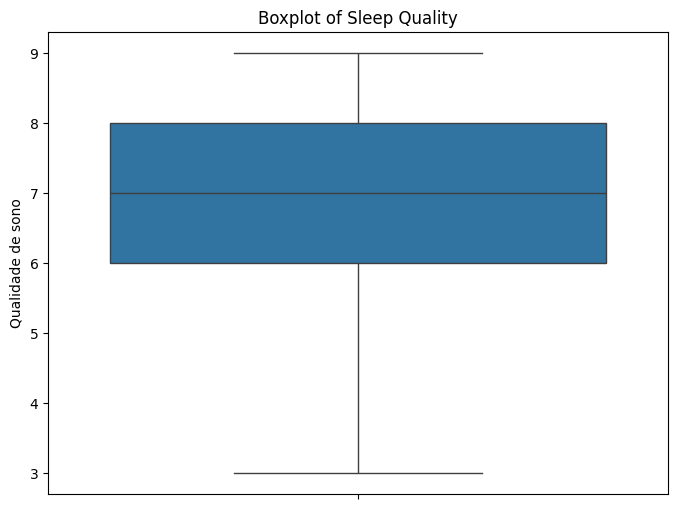

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data)
plt.title('Boxplot of Sleep Quality')
plt.show()

* To measure the variation based on the five number summary, you can find Inter-quartile range or (IQR). Also it doesn't that outliers into account

$$
\text{IQR} = Q_3 - Q_1
$$

In [22]:
quartile_25 = np.percentile(data, 25)
quartile_75 = np.percentile(data, 75)
iqr = quartile_75 - quartile_25
print("IQR: %.2f" % iqr)

IQR: 2.00
